Image Source\
https://www.hindawi.com/journals/cmmm/2020/1405647/\
Figure 6 (f)\
<img src="MRI_ORG.png">

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

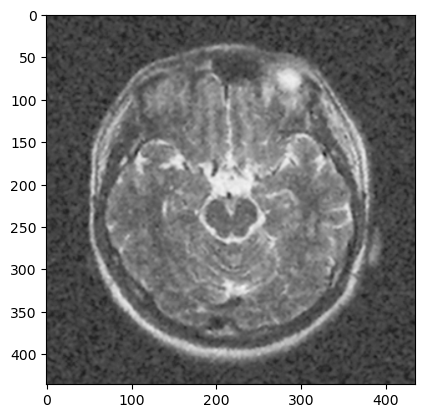

In [2]:
image_org = cv2.imread('MRI_ORG.png')
plt.imshow(image_org)
plt.show

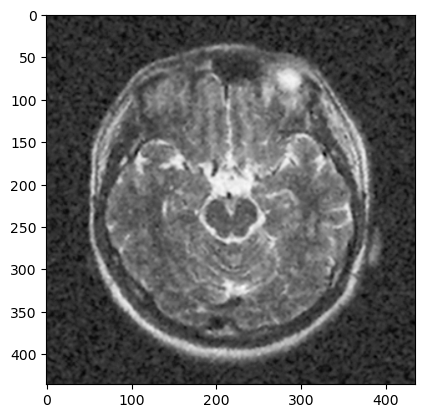

In [3]:
# Gray Level Transformation
image = cv2.imread('MRI_ORG.png', 0)
plt.imshow(image, cmap='gray')
plt.show()

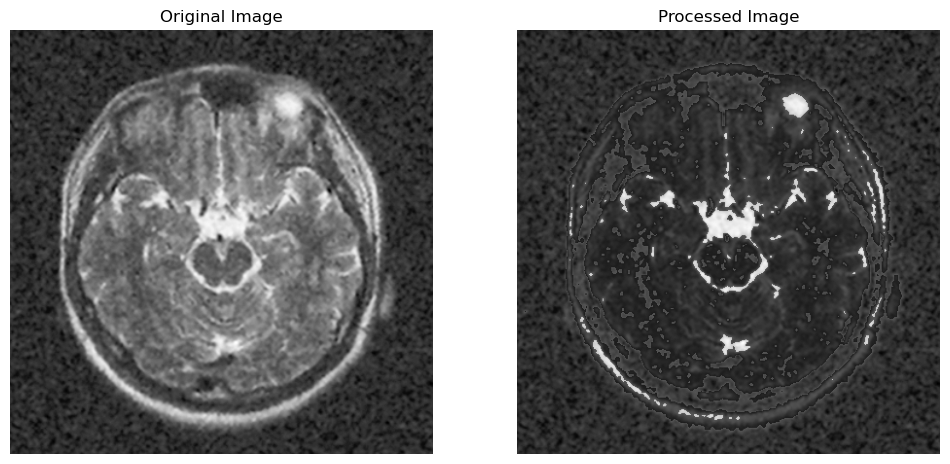

In [4]:
# Piecwise liner transformation
img_original = cv2.imread('MRI_ORG.png', 0)
img = cv2.imread('MRI_ORG.png', 0)
img = img/255
img = 0.5 * img
img[img<(50/255)] = 2 * img[img<(50/255)]
img[img>(100/255)] = 2 * img[img>(100/255)]

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

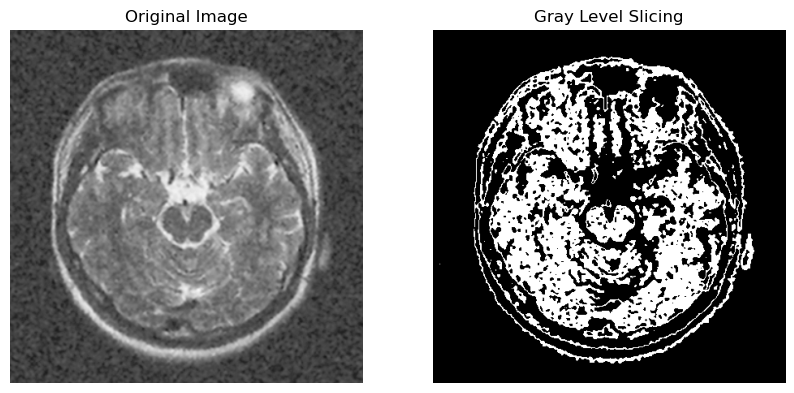

In [5]:
# Gray level Slicing (choose your interest part to slice)
def gray_level_slicing(image_path, min_intensity, max_intensity):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return None

    # Create a binary mask based on the intensity range
    mask = cv2.inRange(image, min_intensity, max_intensity)

    # Create an output image with black background
    output = np.zeros_like(image)

    # Set pixels within the mask to a constant value (255 for white)
    output[mask > 0] = 255

    return output

image_path = 'MRI_ORG.png'
min_intensity = 100
max_intensity = 138
result_image = gray_level_slicing(image_path, min_intensity, max_intensity)


if result_image is not None:
    # Display the original and processed images using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(122)
    plt.title('Gray Level Slicing')
    plt.imshow(result_image, cmap='gray')
    plt.axis('off')

    plt.show()


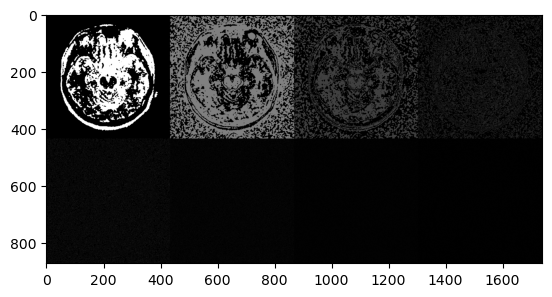

In [6]:
# Bit plane slicing
img = cv2.imread('MRI_ORG.png', 0)
lst = []
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    lst.append(np.binary_repr(img[i][j], width=8))

VIII_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
VII_bit_img  = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
VI_bit_img   = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
V_bit_img    = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
IV_bit_img   = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
III_bit_img  = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
II_bit_img   = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
I_bit_img    = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

finalr = cv2.hconcat([VIII_bit_img, VII_bit_img,VI_bit_img,V_bit_img])
finalv =cv2.hconcat([IV_bit_img,III_bit_img,II_bit_img,I_bit_img])


final = cv2.vconcat([finalr,finalv])

plt.imshow(final, cmap='gray')
plt.show()

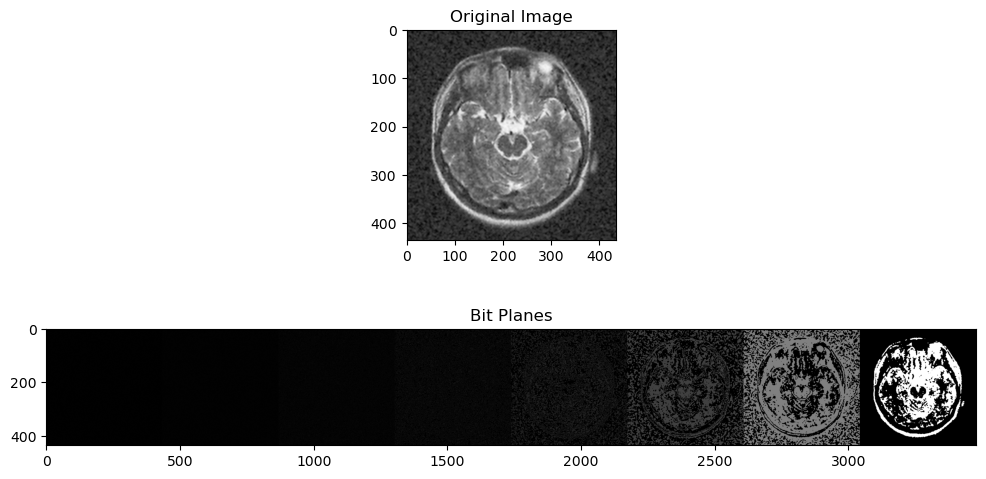

In [7]:
img = cv2.imread('MRI_ORG.png', 0)

# Create a list to store the bit planes
bit_planes = []

# Extract and store the eight bit planes
for i in range(8):
    bit_plane = (img >> i) & 1
    bit_planes.append(bit_plane * (2**i))

# Create a final image by concatenating the bit planes horizontally
final = cv2.hconcat(bit_planes)

# Display the original image and the bit planes
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 1, 2)
plt.imshow(final, cmap='gray')
plt.title('Bit Planes')

plt.show()

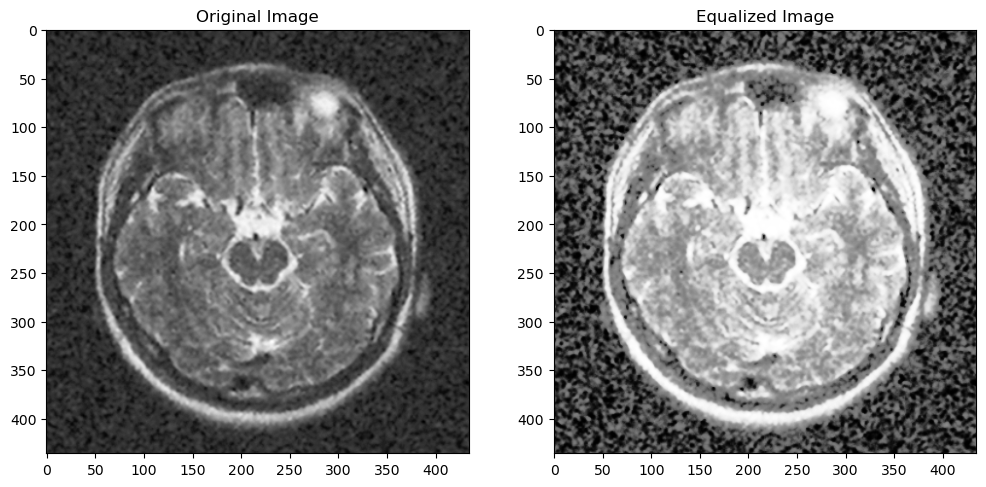

In [8]:
# Histogram equalization
img = cv2.imread('MRI_ORG.png', 0)
equ = cv2.equalizeHist(img)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equ, cmap='gray')

plt.show()


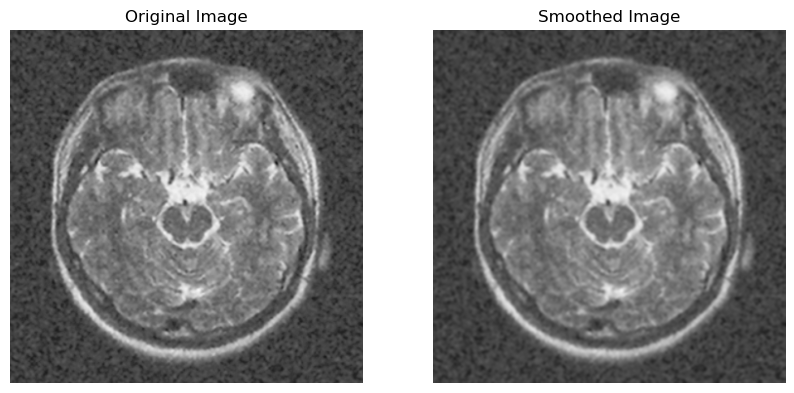

In [9]:
# Smoothing filter / low pass filter
image = cv2.imread('MRI_ORG.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply a smoothing filter (e.g., Gaussian blur)
k_size = (5, 5)  # Kernel size, adjust as needed
sigma_x = 0      # Standard deviation in X direction, 0 for automatic calculation
blurred_image = cv2.GaussianBlur(image, k_size, sigma_x)

# Convert the blurred image from BGR to RGB format
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Create a 1x2 grid of subplots to display original and smoothed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_rgb)
plt.axis('off')
plt.title('Smoothed Image')

plt.show()



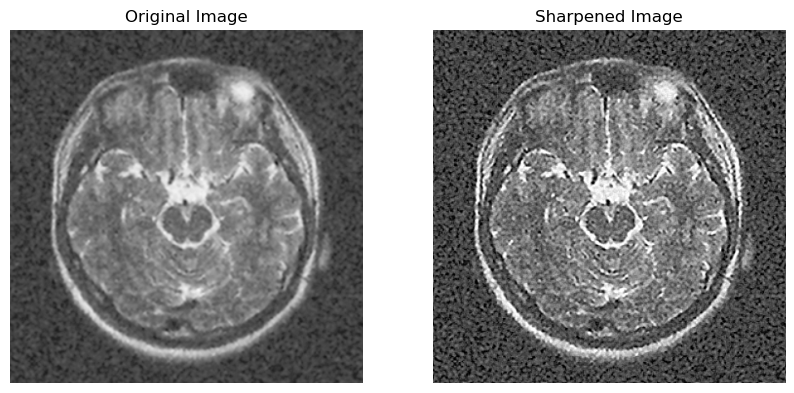

In [10]:
# Sharpening filter / high pass filter
image = cv2.imread('MRI_ORG.png')
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

sharpened_image = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)  # Sharpened image
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

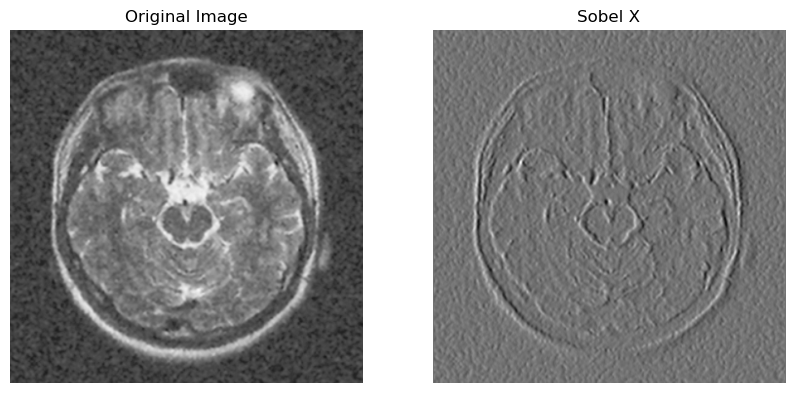

In [11]:
# Sobel X
image = cv2.imread('MRI_ORG.png', 0)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.show()

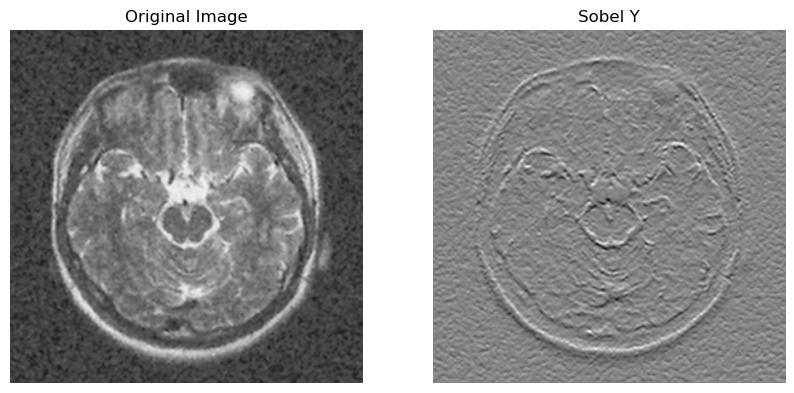

In [12]:
# Sobel y
image = cv2.imread('MRI_ORG.png', 0)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.show()

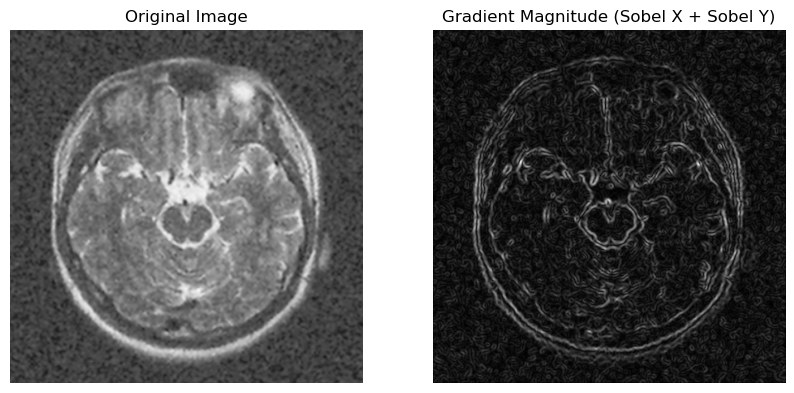

In [13]:
# Sobel x+y

image = cv2.imread('MRI_ORG.png', 0)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude (Sobel X + Sobel Y)')
plt.axis('off')

plt.show()



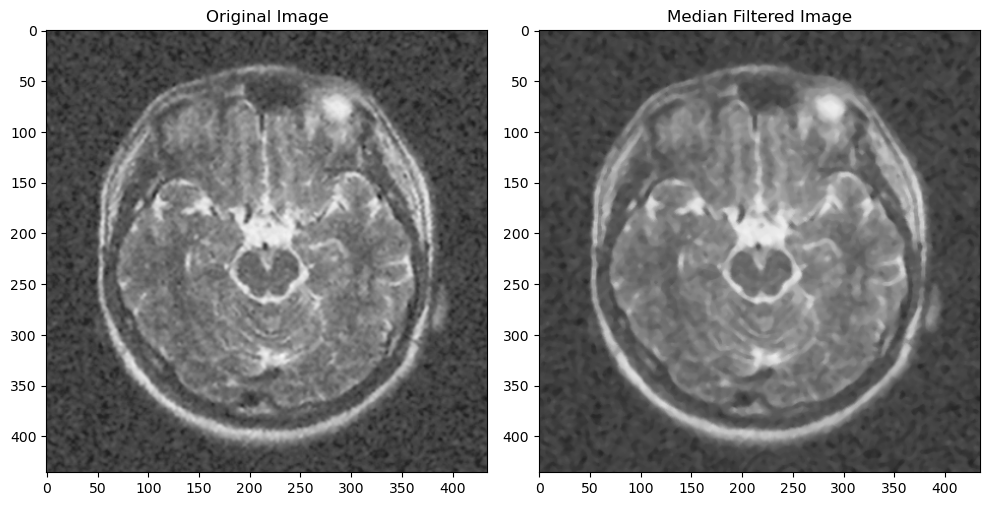

In [14]:
# Median Filter
image = cv2.imread('MRI_ORG.png', cv2.IMREAD_COLOR)

# Check if the image was read successfully
if image is None:
    print('Error: Could not open or find the image.')
else:
    # Step 2: Apply median filter
    filtered_image = cv2.medianBlur(image, 5)  # 5 is the kernel size, you can adjust it

    # Step 3: Convert BGR to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    filtered_image_rgb = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)

    # Step 4: Display the original and filtered images using Matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    
    plt.subplot(122)
    plt.imshow(filtered_image_rgb)
    plt.title('Median Filtered Image')

    plt.tight_layout()
    plt.show()

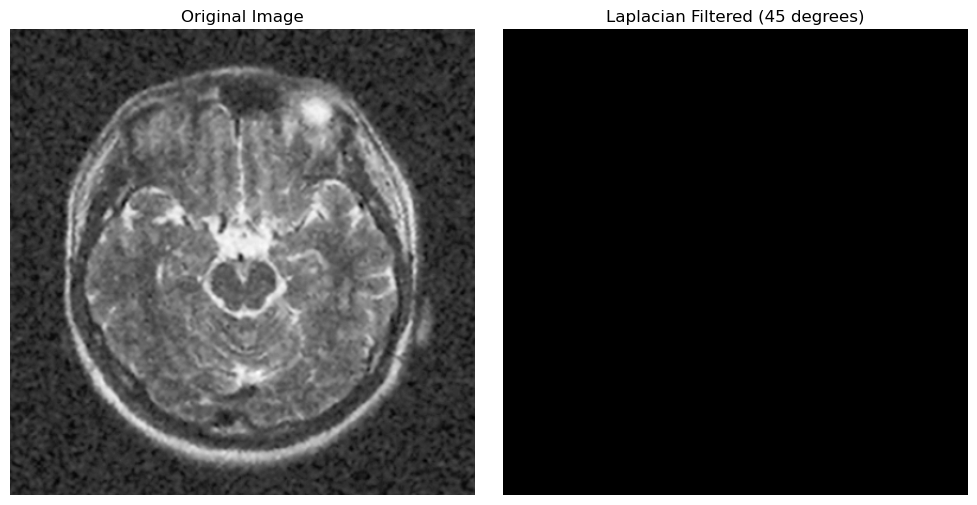

In [15]:
# Laplacian Masks 45 degrees
image = 'MRI_ORG.png'
original_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

angle = 45
size = 3
angle_rad = np.deg2rad(angle)
cosine = np.cos(angle_rad)
sine = np.sin(angle_rad)

kernel = np.array([[cosine**2, -cosine * sine, sine**2],
                   [-cosine * sine, 1 - 2 * (cosine**2 + sine**2), -cosine * sine],
                   [sine**2, -cosine * sine, cosine**2]])


laplacian_filtered = cv2.filter2D(original_image, -1, kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_filtered, cmap='gray')
plt.title('Laplacian Filtered (45 degrees)')
plt.axis('off')

plt.tight_layout()
plt.show()

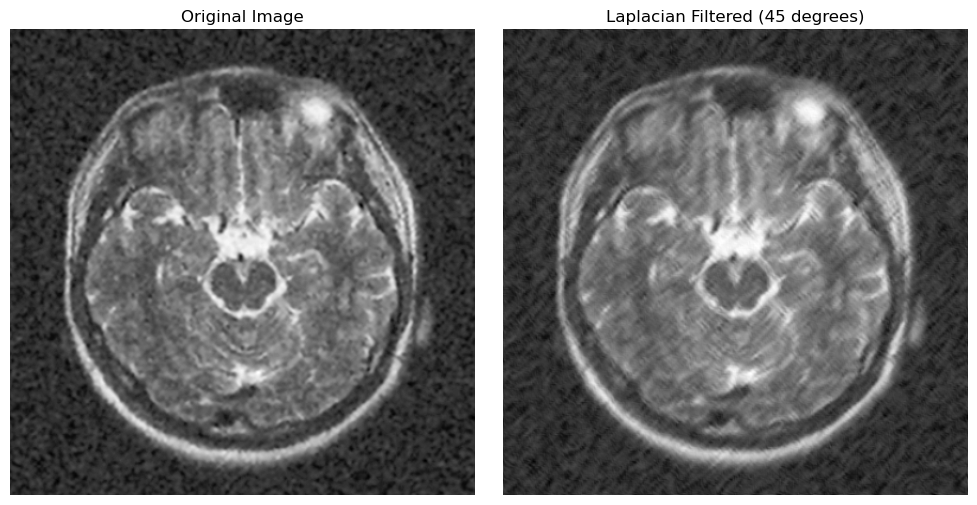

In [16]:
# Laplacian Masks 90 degrees

image = 'MRI_ORG.png'
original_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

angle = 90
size = 3
angle_rad = np.deg2rad(angle)
cosine = np.cos(angle_rad)
sine = np.sin(angle_rad)

kernel = np.array([[cosine**2, -cosine * sine, sine**2],
                   [-cosine * sine, 1 - 2 * (cosine**2 + sine**2), -cosine * sine],
                   [sine**2, -cosine * sine, cosine**2]])


laplacian_filtered = cv2.filter2D(original_image, -1, kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_filtered, cmap='gray')
plt.title('Laplacian Filtered (45 degrees)')
plt.axis('off')

plt.tight_layout()
plt.show()

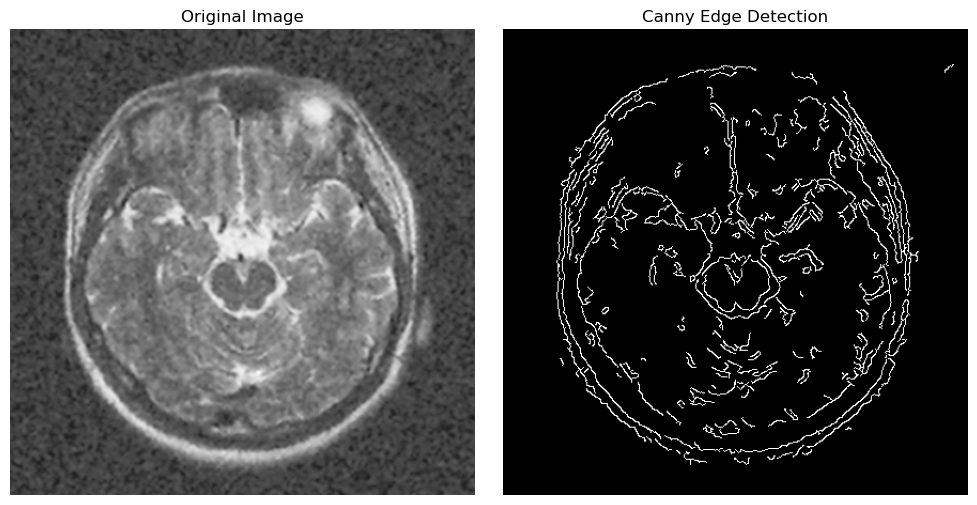

In [17]:
# Canny

image = cv2.imread('MRI_ORG.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 200)

plt.figure(figsize=(10, 5))  


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout() 
plt.show()


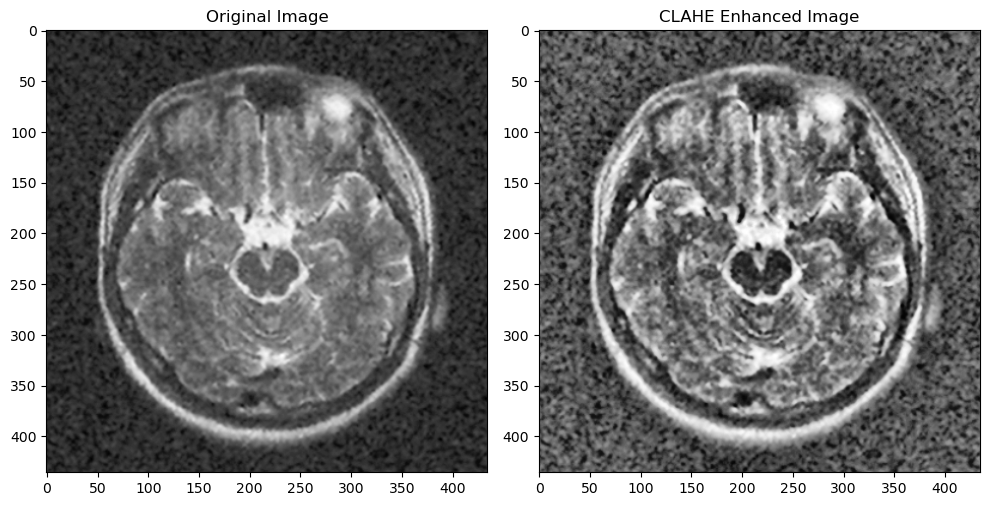

In [19]:
image_path = "MRI_ORG.png" 
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the image
clahe_image = clahe.apply(original_image)

# Plot the original and CLAHE-enhanced images side by side
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Enhanced Image')

plt.tight_layout()
plt.show()